# Install Required Libraries

In [2]:
#pip install numpy pandas matplotlib scikit-learn

# Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [5]:
%matplotlib inline

# Load and Explore the Data

In [7]:
df = pd.read_csv('DataSets/2.Regression-Salary_Pred-2i 1o.csv')

In [8]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [10]:
df.corr()

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


In [147]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [149]:
df.isnull().sum()

age           0
experience    0
income        0
dtype: int64

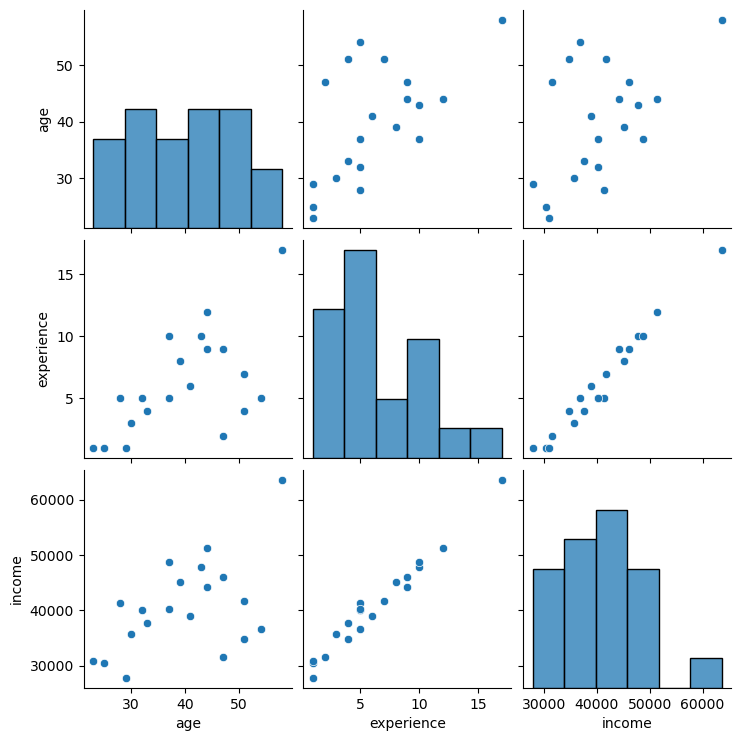

In [11]:
sns.pairplot(df)

<Axes: >

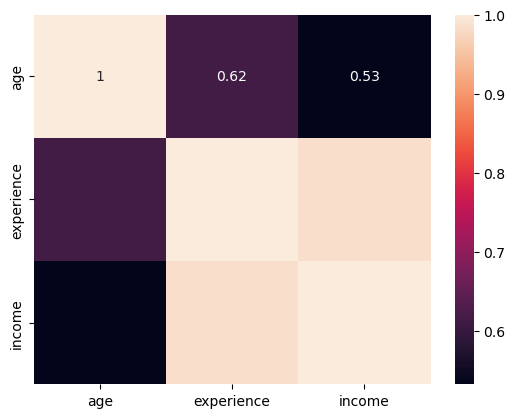

In [151]:
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'experience')

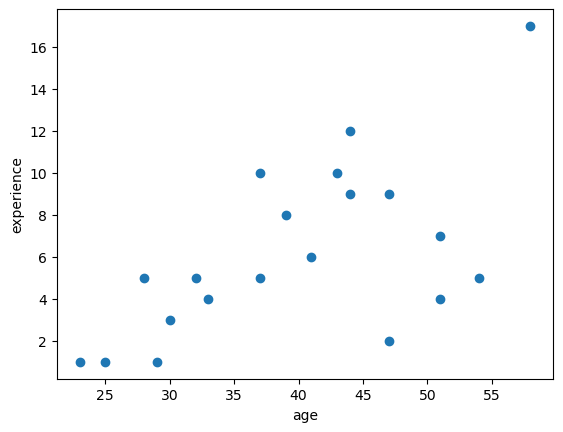

In [157]:
plt.scatter(df['age'],df['experience'])
plt.xlabel("age")
plt.ylabel("experience")

In [106]:
##divide our dataset into independent and dependent features

X=df.drop(columns=["income"],axis=1,inplace=False)
y=df['income']

In [108]:
X.head()

,age,experience
0,25,1
1,30,3
2,47,2
3,32,5
4,43,10


In [110]:
y.head()

0    30450
1    35670
2    31580
3    40130
4    47830
Name: income, dtype: int64

# Split the Data into Training and Test Sets ; 
### &
# Scaling

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
print('X:      ',X.shape)
print('X_train:',X_train.shape)
print('X_test: ',X_test.shape)
print('y:      ',y.shape)
print('y_train:',y_train.shape)
print('y_test: ',y_test.shape)

X:       (20, 2)
X_train: (16, 2)
X_test:  (4, 2)
y:       (20,)
y_train: (16,)
y_test:  (4,)


In [117]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Define and Train the Linear Regression Model

In [120]:
# Initializing the Linear Regression model
model = LinearRegression()

In [122]:
# Training the model on the training data
model.fit(X_train,y_train)

LinearRegression()

#  Make Predictions

In [125]:
# Making predictions on the test data
y_pred=model.predict(X_test)

In [127]:
y_pred

array([31093.38107376, 31295.49954076, 40250.46080162, 34897.6958918 ])

# Evaluate the Model

In [130]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 753796.7693734535
Mean Absolute Error: 797.9113810821873
R-squared: 0.9387098237077888


In [132]:
y_test

0     30450
17    30870
15    38900
1     35670
Name: income, dtype: int64

In [134]:
y_pred

array([31093.38107376, 31295.49954076, 40250.46080162, 34897.6958918 ])

# Residuals

In [137]:
residuals=y_test-y_pred
print(residuals)

0     -643.381074
17    -425.499541
15   -1350.460802
1      772.304108
Name: income, dtype: float64


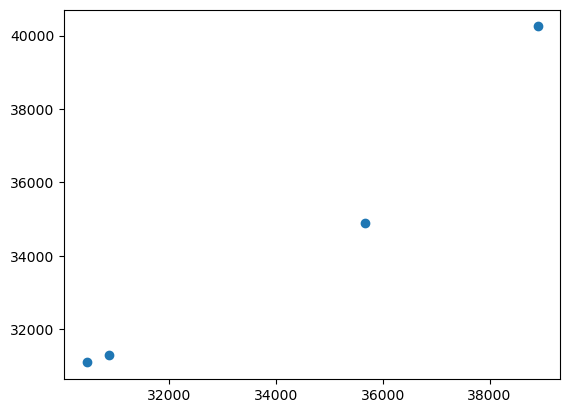

In [139]:
plt.scatter(y_test,y_pred)

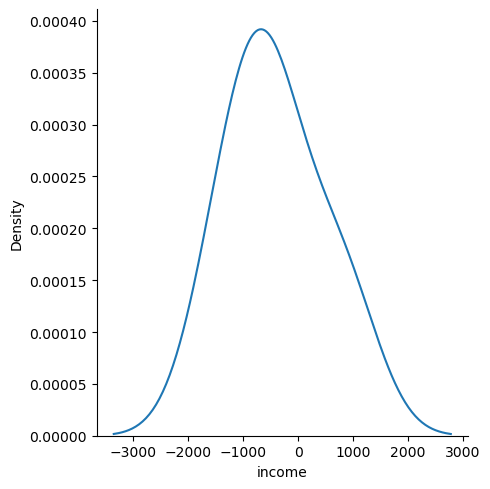

In [141]:
## Plot this residuals
sns.displot(residuals,kind='kde')

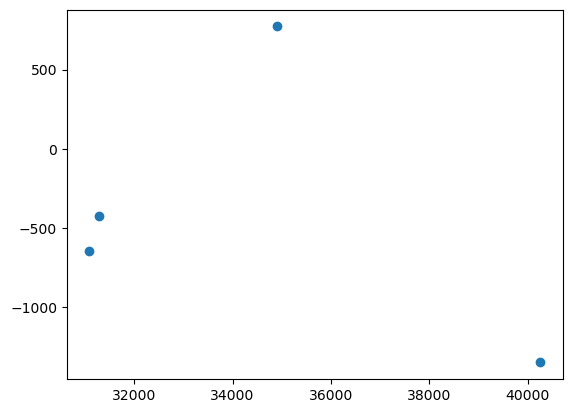

In [143]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [145]:
model.coef_

array([-884.53894609, 8465.28543013])

ValueError: x and y must have same first dimension, but have shapes (16, 2) and (4,)

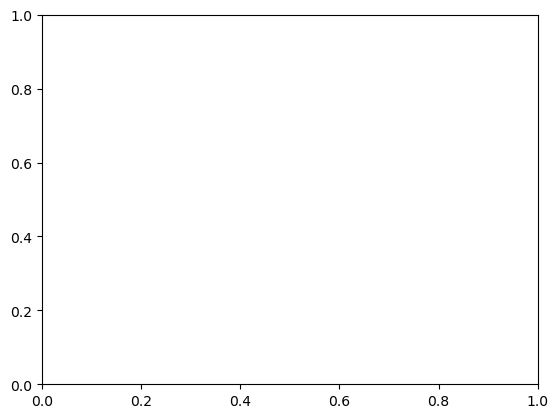

In [165]:
#plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred)